In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
# for question 2
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assignment 6


## Questions (10 pts)
Use code from Assignment 4, questions 1 and 2 to 
* Read the mpg.csv file and create dataframe and name it 'mpg_df'
* Perform the following data preprocessing and name the updated dataframe 'mpg_updated':
  * Remove the 'car name' column
  * Change the column name 'model year' to 'year'
  * Drop rows with missing values.

In [63]:
mpg_df = pd.read_csv('mpg.csv')
def Preprocessing(input_data):
    data = input_data.copy()
    data = data.drop(['car name'], axis=1)
    data = data.rename(columns = {'model year': 'year'})
    data = data.dropna()
    return data

#Report results
mpg_updated = Preprocessing(mpg_df)
mpg_updated.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


### Question 1: Prepare the following dataframes (1 points)
 use 'mpg_updated' to
  * Create a dataframe called 'Y' incluiding only the column 'mpg' (this is the response variable)
  * Create a dataframe called 'X' with the remaining columns (these are the features columns)
  * Prepare 'X_train': random 80% rows of the dataframe 'X'
  * Prepare 'X_test': random 20% rows of the dataframe 'X'
  * Prepare 'Y_train': random 80% rows of the dataframe 'Y'
  * Prepare 'Y_test': random 20% rows of the dataframe 'Y'

In [64]:
# dataframe Y with only one column mpg - response variable
Y = mpg_updated['mpg']

# dataframe X with the rest of the columns - feature columns
X = mpg_updated.drop(columns=['mpg'])

# X_train with random 80% rows of dataframe X
X_train = X.sample(frac=0.8, random_state=1)

# X_test with random 20% rows of dataframe X 
X_test = X.sample(frac=0.2, random_state=1)

# Y_train with random 80% rows of dataframe Y
Y_train = Y.sample(frac=0.8, random_state=1)

# Y_test with random 20% rows of dataframe Y
Y_test = Y.sample(frac=0.2, random_state=1)

### Q2: create a model, train, and report performance (3 points)
* Create a support vector regression model from scikit learn package. Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR. make sure to put `kernel='linear'` when creating your model.
* Train your model using the train data that you created above. 
* Produce predictions over the test data.
* Report the model performance over the test data by printing metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.

In [65]:

svr_model = SVR(kernel='linear')

svr_model.fit(X_train, Y_train)

Y_pred = svr_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 20.74205157365018
R-squared (R2): 0.6982926204953464


### Q3: repeat Q2, but use StandardScaler to scale your data (2 points)

* Scale the data in the proper way and convert the scaled datasets into pandas dataframes (remember scaler.transform() returns numpy array not a dataframe)
* Fit the model using the scaled train dataframe.
* Produce predictions over the scaled test dataframe.
* Report the model performance over the scaled test dataframe by printing metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error


In [66]:

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

svr_model.fit(X_train_scaled_df, Y_train)

Y_pred = svr_model.predict(X_test_scaled_df)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.375144795632894
Mean Squared Error (MSE): 11.61851002934665
Root Mean Squared Error (RMSE): 3.4085935559034684


### Q4: extract coef_ from the model and plot (2 points)

* Extract and report the coefficients (i.e. coef_) of the model trained on the scaled data
* Create a bar chart

In [67]:
coefficients = svr_model.coef_.flatten() 

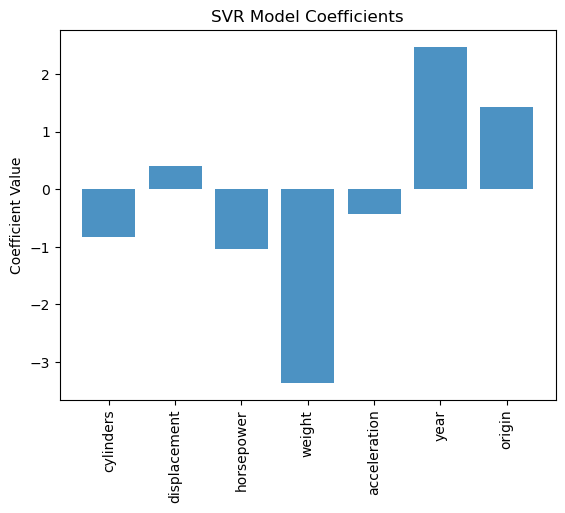

In [68]:
feature_names = X_train.columns
y_pos = np.arange(len(feature_names))

plt.bar(y_pos, coefficients, align='center', alpha=0.8)
plt.xticks(y_pos, feature_names, rotation='vertical')
plt.ylabel('Coefficient Value')
plt.title('SVR Model Coefficients')

plt.show()

### Q5: plot scaled 'weight' vs 'mpg' (2 points)
Create a scatter plot
* where x is scaled values of 'weight' in your train dataset and y is the Y_train
* Add a line to this plot. the line needs to pass through the average of normalized values of 'weight' and the average of Y_train. the slope of the line should be equal to the coef_ of 'weight' that you reported in the Question 4

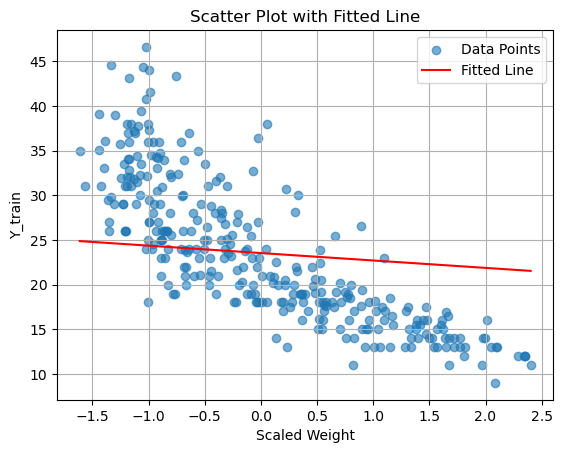

In [69]:
# Find the mean of normalized values of 'weight' and Y_train
mean_weight = X_train_scaled_df['weight'].mean()
mean_Y_train = Y_train.mean()

# Calculate the intercept for the line using the coefficient of 'weight'
intercept = mean_Y_train - coefficients[0] * mean_weight

# Create the scatter plot
plt.scatter(X_train_scaled_df['weight'], Y_train, alpha=0.6, label='Data Points')

# Add the line passing through the averages
x_line = np.linspace(X_train_scaled_df['weight'].min(), X_train_scaled_df['weight'].max(), 100)
y_line = coefficients[0] * x_line + intercept
plt.plot(x_line, y_line, color='red', label='Fitted Line')

plt.xlabel('Scaled Weight')
plt.ylabel('Y_train')
plt.title('Scatter Plot with Fitted Line')
plt.legend()
plt.grid(True)
plt.show()